In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('/Users/matt/workspace/style.mplstyle')
#plt.style.use('fivethirtyeight')

In [2]:
def kpa_to_psi(kpa):
    return kpa*0.1456038

def c_to_f(c):
    return c*1.8+32

def print_lap_times(df: pd.DataFrame,
                    lap_number: str='lap_number',
                    elapsed_time: str='elapsed_time',
                    distance_traveled: str='distance_traveled'):
    header = '{:<7}{:<10}{:>7}'.format('Lap', 'Time', 'Distance')
    print(header)
    for key, grp in df.groupby('lap_number'):
        dt = grp[elapsed_time].max()-grp[elapsed_time].min()
        dd = grp[distance_traveled].max()-grp[distance_traveled].min()
        s=f"{key:<7d}{dt:<10.3f}{dd:>.3f}"
        print(s)

In [69]:
track='Sebring International Raceway'

logo = plt.imread('./sebring_logo.png')

# Load data

In [63]:
ecs = pd.read_csv('./latapx-session_20230818_132657_sebring_on_conti_ecs_laps8-9_v3.csv')
rt = pd.read_csv('./latapx-session_20230818_144955_sebring_on_rt660_laps4-6_v3.csv')
rt_overfill = pd.read_csv('./latapx-session_overfill-20230818_161117_sebring_on_rt660_laps4-8_v3.csv')

In [64]:
# convert units
ecs = ecs.dropna(subset=['engine_oil_pressure'])
ecs['engine_psi'] = ecs.apply(lambda x: kpa_to_psi(x['engine_oil_pressure']), axis=1)
ecs['engine_oil_temp_f'] = ecs.apply(lambda x: c_to_f(x['engine_oil_temp']), axis=1)

rt = rt.dropna(subset=['engine_oil_pressure'])
rt['engine_psi'] = rt.apply(lambda x: kpa_to_psi(x['engine_oil_pressure']), axis=1)
rt['engine_oil_temp_f'] = rt.apply(lambda x: c_to_f(x['engine_oil_temp']), axis=1)

rt_overfill = rt_overfill.dropna(subset=['engine_oil_pressure'])
rt_overfill['engine_psi'] = rt_overfill.apply(lambda x: kpa_to_psi(x['engine_oil_pressure']), axis=1)
rt_overfill['engine_oil_temp_f'] = rt_overfill.apply(lambda x: c_to_f(x['engine_oil_temp']), axis=1)

In [105]:
rt_overfill['engine_oil_temp_f'].min()

-40.0

# Plots

In [6]:
def plot_psi_by_lap(ax,
                    df: pd.DataFrame,
                    lap_number: str='lap_number',
                    elapsed_time: str='elapsed_time',
                    oil_pressure: str='engine_psi'):

    g = sns.lineplot(ax = ax, x = elapsed_time, y = oil_pressure, data = data, lw=1)
    for idx, lap in enumerate(data[lap_number].unique()):
        tick = data.loc[data[lap_number] == lap, elapsed_time].max()
        ax.axvline(x=tick, ls = ':', color='k', lw=1)
    return g

In [8]:

#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.

#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
#ab = AnnotationBbox(imagebox, (5, 700), frameon = False)
#ax.add_artist(ab)

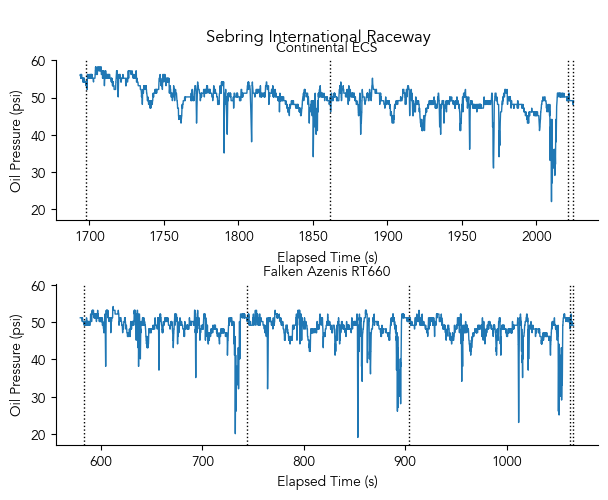

In [185]:
fig, ax = plt.subplots(2,1, figsize=(7,5), sharey='col')
axl = ax.flatten()

dd = {
    'Continental ECS': ecs,
    'Falken Azenis RT660': rt,
    #'Falken Azenis RT660 1/2qt-overfill': rt_overfill
}
titles = list(dd.keys())
dfs = list(dd.values())

for idx, data in enumerate(dfs):
    a = axl[idx]
    g = plot_psi_by_lap(ax = a, df = data)
    a.set_xlabel('Elapsed Time (s)', fontsize=10)
    a.set_ylabel('Oil Pressure (psi)', fontsize=10)
    a.set_title(titles[idx], fontsize=10)

title=f"""
{track}
"""
fig.suptitle(title,fontsize=12)
fig.subplots_adjust(hspace=0.4)
fig.savefig(f'./figures/time_vs_oil_psi.png', bbox_inches='tight', facecolor='w', dpi=150)
pass

## Select best lap

In [72]:
print_lap_times(ecs)
print_lap_times(rt)
print_lap_times(rt_overfill)

Lap    Time      Distance
7      3.965     169.458
8      163.517   5795.360
9      159.794   5796.615
10     3.796     182.307
Lap    Time      Distance
3      3.971     170.359
4      159.972   5794.531
5      159.835   5791.804
6      158.831   5796.201
7      3.753     180.997
Lap    Time      Distance
3      3.960     170.566
4      160.351   5799.167
5      161.321   5801.153
6      168.180   5801.891
7      161.937   5797.818
8      160.243   5795.693
9      4.052     195.833


In [77]:
# set best lap
ecs_fast = ecs.loc[ecs['lap_number'] == 9]
rt_fast = rt.loc[rt['lap_number'] == 6]
rt_of_fast = rt_overfill.loc[rt_overfill['lap_number']==8]

# Engine pressure, temp, lat accel

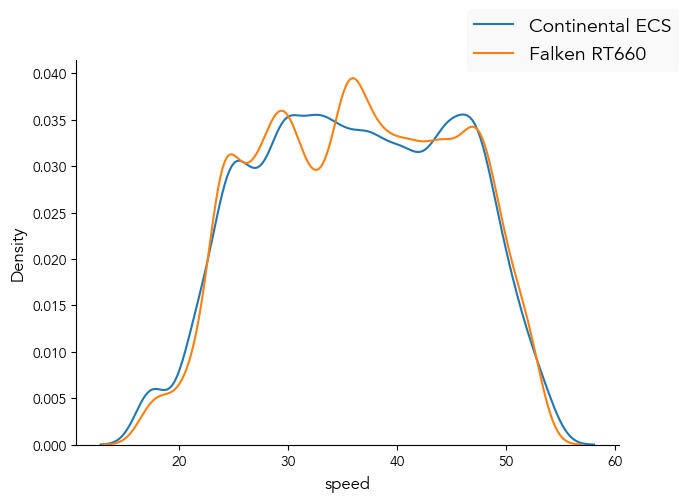

In [199]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(ax = ax, x = 'speed', data = ecs_fast, label='Continental ECS')
sns.kdeplot(ax = ax, x = 'speed', data = rt_fast, label='Falken RT660')
fig.legend()

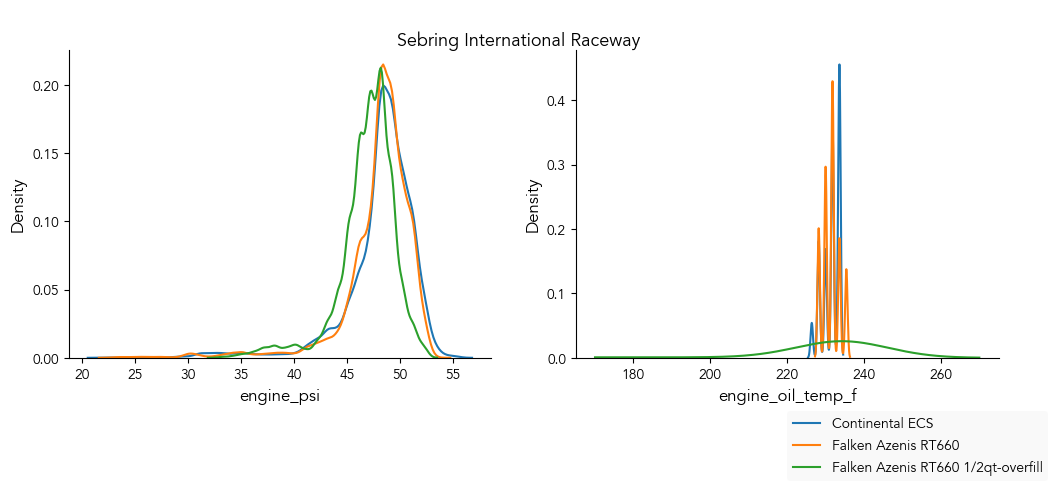

In [196]:
variables = ['engine_psi', 'engine_oil_temp_f']
fig, ax = plt.subplots(1,2,figsize=(12,4))
axl = ax.flatten()

dd = {
    'Continental ECS': ecs_fast,
    'Falken Azenis RT660': rt_fast,
    'Falken Azenis RT660 1/2qt-overfill': rt_of_fast
}
titles = list(dd.keys())
dfs = list(dd.values())

for idx, v in enumerate(variables):
    a = axl[idx]
    clip=None
    if idx==1:
        clip=(170,270)
    for i, data in enumerate(dfs):
        sns.kdeplot(ax = a,x = v, data = data, label=titles[i],clip=clip)

title=f"""
{track}
"""
a.legend(loc=(0.5,-0.4), fontsize=10)
fig.suptitle(title,fontsize=13)
fig.subplots_adjust(hspace=0.3)
fig.savefig(f'./figures/kde_plots_all_sets.png', bbox_inches='tight', facecolor='w', dpi=150)
pass

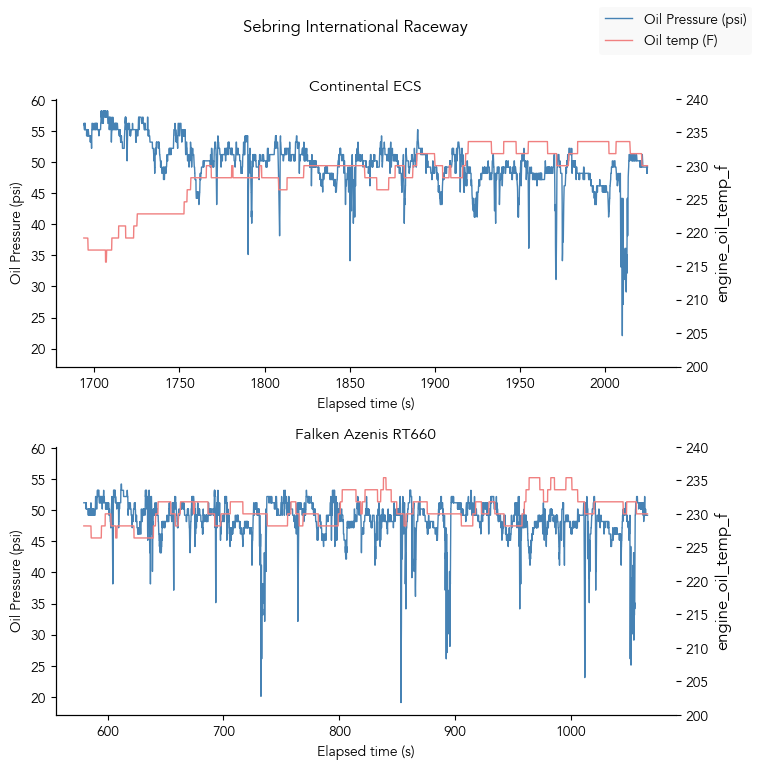

In [220]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharey=True)
axl = ax.flatten()

# dd = {
#     'Continental ECS (Lap 9)': ecs_fast,
#     'Falken Azenis RT660 (Lap 6)': rt_fast
# }
dd = {
    'Continental ECS': ecs,
    'Falken Azenis RT660': rt
}

titles = list(dd.keys())
dfs = list(dd.values())

y1 = 'engine_psi'
y2 = 'engine_oil_temp_f'

for idx, data in enumerate(dfs):
    a = axl[idx]
    a2 = a.twinx()
    sns.lineplot(ax = a, x = 'elapsed_time', y = y1, data = data, color='steelblue',
                 lw=1, label = 'Oil Pressure (psi)', legend=False)
    sns.lineplot(ax = a2, x = 'elapsed_time', y = y2, data = data, color='lightcoral',
                 lw=1, label='Oil temp (F)', legend=False)
    a.set_xlabel('Elapsed time (s)', fontsize=10)
    a.set_ylabel('Oil Pressure (psi)', fontsize=10)
    a.set_title(f'{titles[idx]}', fontsize=11)

    # set x limits
    a2.set_ylim([200,240])

#a.imshow(logo, aspect='auto', extent=(0.4, 0.6, .5, .7), zorder=-1)
h1,l1 = a.get_legend_handles_labels()
h2,l2 = a2.get_legend_handles_labels()
h1.append(h2[0])
l1.append(l2[0])
fig.legend(h1,l1, fontsize=10)
fig.suptitle(f'{track}', fontsize=12)
fig.subplots_adjust(hspace=0.3)
fig.savefig(f'./figures/session_{y1}_{y2}.png', bbox_inches='tight', facecolor='w', dpi=150)
pass

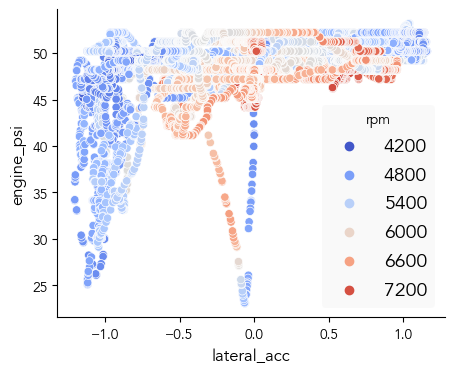

In [48]:
plot_data = rt_fast

fig, ax = plt.subplots(figsize=(5,4))

sns.scatterplot(ax = ax, x = 'lateral_acc', y = 'engine_psi',
                data = rt_fast, hue = 'rpm', palette='coolwarm',
                #hue_norm = (-1.5, 1.5),
               )
#x = np.arange(4000,7501)
#y = x/100
#a.plot(x,y)
#fig.savefig('./vir/figures/lap_4_oil_psi_2scatter.png',bbox_inches='tight', facecolor='w')
pass

## GPS

In [14]:
ecs_gdf = gpd.GeoDataFrame(data = ecs_fast,
                           geometry = gpd.points_from_xy(ecs_fast['longitude'], ecs_fast['latitude']))
rt_gdf = gpd.GeoDataFrame(data = rt_fast,
                          geometry = gpd.points_from_xy(rt_fast['longitude'], rt_fast['latitude']))

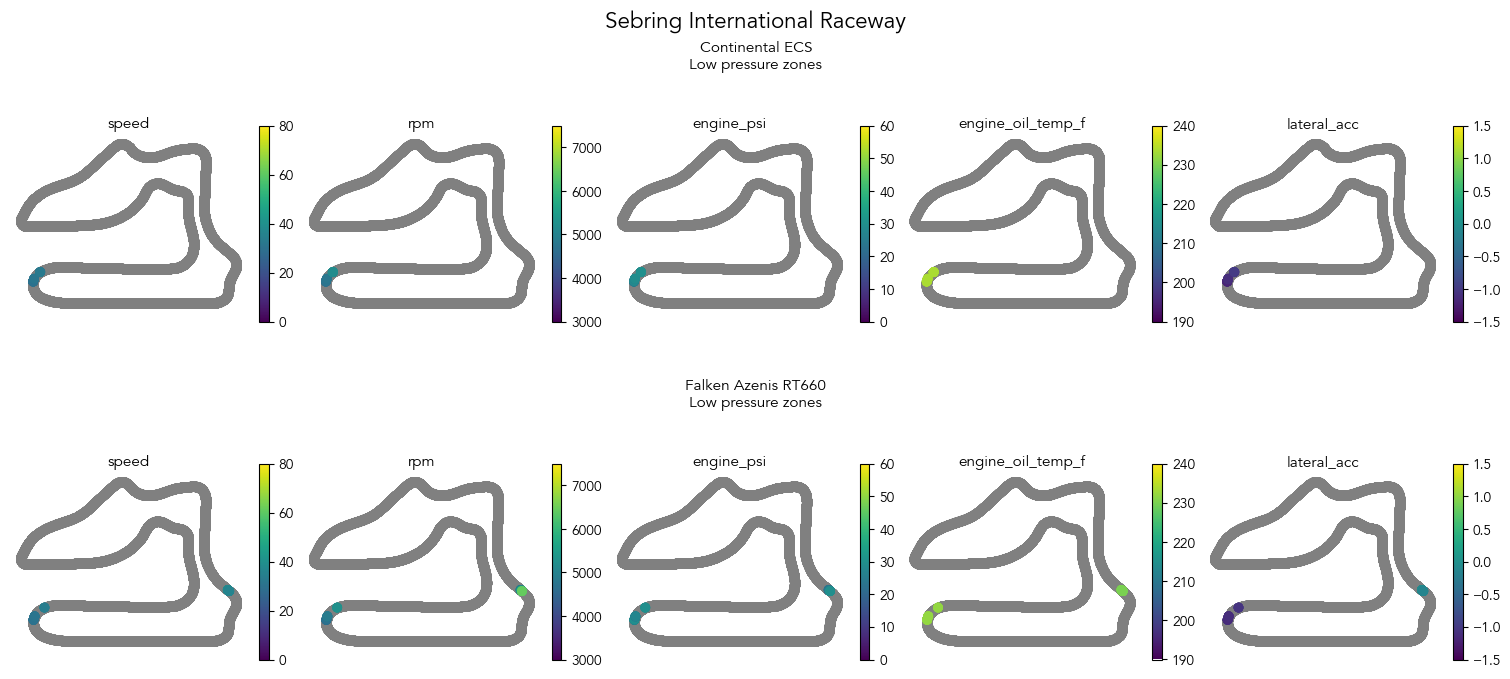

In [212]:
variables = ['speed', 'rpm', 'engine_psi', 'engine_oil_temp_f',  'lateral_acc']
var_limits = {
    'speed': (0,80),
    'rpm': (3000,7500),
    'engine_psi': (0,60),
    'engine_oil_temp_f': (190,240),
    'lateral_acc': (-1.5,1.5)
}

dd = {
    'Continental ECS': ecs_gdf,
    'Falken Azenis RT660': rt_gdf
}
titles = list(dd.keys())
dfs = list(dd.values())

#
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.suptitle(track,fontsize=16)

subfigs = fig.subfigures(nrows=2, ncols=1)
for idx, sf in enumerate(subfigs):
    subtitle=f'{titles[idx]}\nLow pressure zones'
    sf.suptitle(subtitle, fontsize=11)
    axs = sf.subplots(1, len(variables))
    for col, v in enumerate(variables):
        ax = axs[col]
        data = dfs[idx]
        lp = data.loc[data['engine_psi'] <= 30]
        hp = data.loc[data['engine_psi'] > 30]
        vmin, vmax = var_limits[v]
        hp.plot(ax = ax,
                c='grey',
                  legend = False,
                  )
        lp.plot(ax = ax,
                column = v,
                cmap='viridis',
              vmin = vmin,
              vmax = vmax,
              legend = True,
              legend_kwds = {'shrink': 0.7}
              )
        
        # data.plot(ax = ax,
        #           column = v,
        #           cmap = 'viridis',
        #           vmin = vmin,
        #           vmax = vmax,
        #           legend = True,
        #           legend_kwds = {'shrink': 0.7}
        #           )
        ax.set_title(f'{v}', fontsize=11)
        ax.axis('off')
fig.savefig(f'./figures/gps_plots_low_pressure.png', bbox_inches='tight', facecolor='w', dpi=150)
pass

## Continental vs Falken

In [169]:
merged = gpd.sjoin_nearest(rt_gdf, ecs_gdf, how='inner',
                           lsuffix='falken',
                           rsuffix='conti',
                           distance_col='dist_col')

variables = ['speed', 'rpm', 'engine_psi', 'engine_oil_temp_f', 'lateral_acc']
delta_variables = []
prefix = '$\Delta$'
for v in variables:
    merged[f'{prefix}_{v}'] = merged[f'{v}_falken'] - merged[f'{v}_conti']
    delta_variables.append(f'{prefix}_{v}')

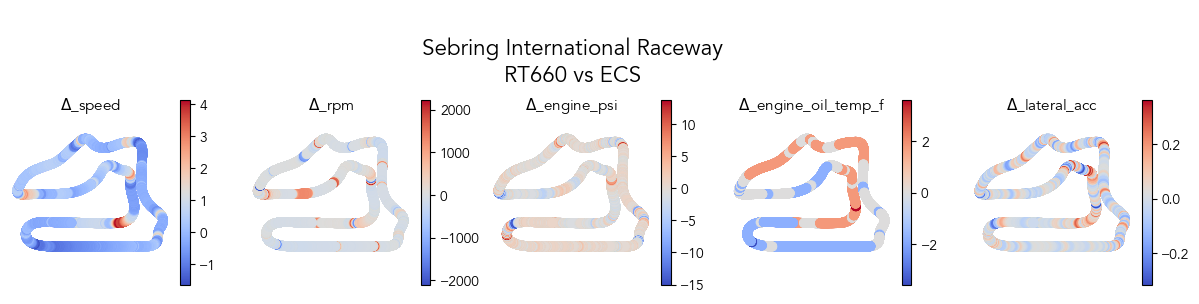

In [182]:
#
fig, ax = plt.subplots(1, len(delta_variables), figsize=(15,6))
title=f"""
{track}
RT660 vs ECS
"""
fig.suptitle(title,fontsize=16, y=0.8)

axs = ax.flatten()
for col, v in enumerate(delta_variables):
    a = axs[col]
    merged.plot(ax = a,
              column = v,
              cmap = 'coolwarm',
              legend = True,
              legend_kwds = {'shrink': 0.4}
              )
    a.set_title(f'{v}', fontsize=11)
    a.axis('off')
fig.savefig(f'./figures/gps_diff.png', bbox_inches='tight', facecolor='w', dpi=150)
pass

# High/low characteristics

In [221]:
high = rt.loc[rt['engine_psi'] >= 35]
low = rt.loc[rt['engine_psi'] < 35]

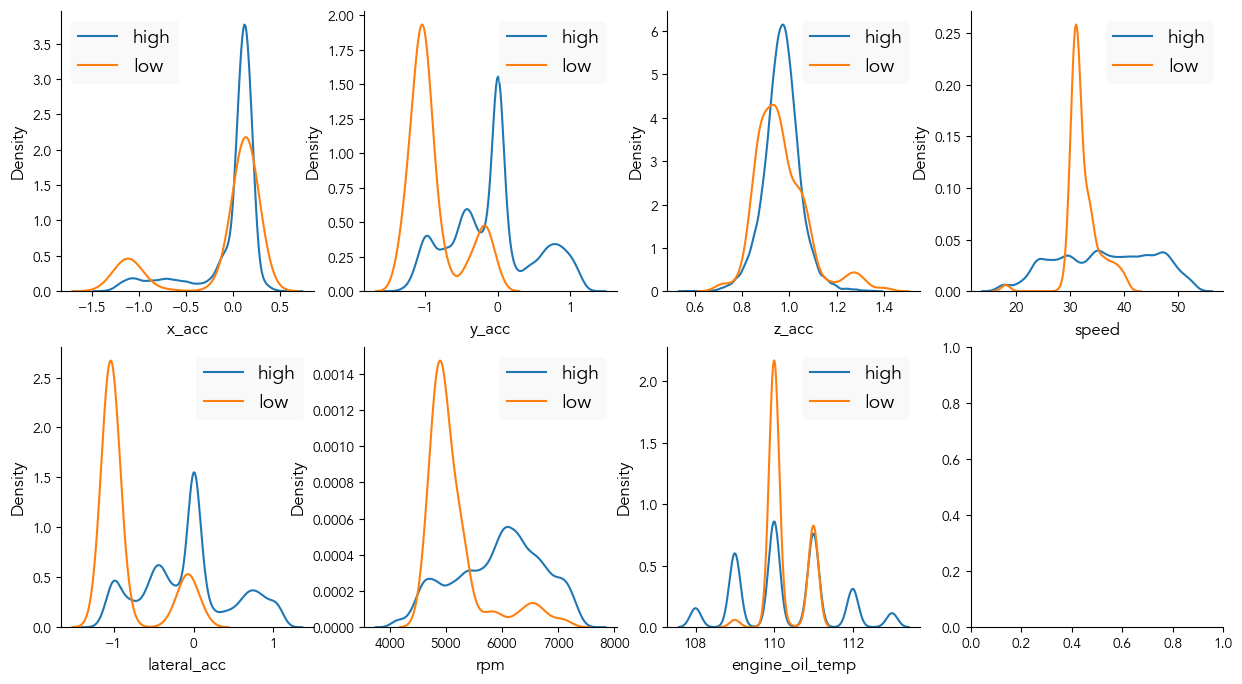

In [230]:
features = ['x_acc', 'y_acc', 'z_acc', 'speed',
            'lateral_acc', 'rpm', 'engine_oil_temp']

fig, ax = plt.subplots(2, 4, figsize=(15,8))
axl = ax.flatten()

for idx, feat in enumerate(features):
    a = axl[idx]
    sns.kdeplot(ax = a, x = feat, data = high, label= 'high')
    sns.kdeplot(ax = a, x = feat, data = low, label= 'low')
    a.legend()
pass